# P1 plot

In [39]:
from PIL import Image

import torch
from transformers import AutoProcessor, LlavaForConditionalGeneration
from glob import glob
from tqdm import tqdm
import sys
import os

device = 'cuda'

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fe01c1d2820>>
Traceback (most recent call last):
  File "/home/lonian/anaconda3/envs/dlcv_3/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [ ]:
model_id = "llava-hf/llava-1.5-7b-hf"
model = LlavaForConditionalGeneration.from_pretrained(
    model_id, 
    torch_dtype=torch.float16, 
    low_cpu_mem_usage=True, 
    output_attentions=True,
    return_dict_in_generate=True
).to(device)

processor = AutoProcessor.from_pretrained(model_id)

# Define a chat histiry and use `apply_chat_template` to get correctly formatted prompt
# Each value in "content" has to be a list of dicts with types ("text", "image") 
# setting 1


Loading checkpoint shards: 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]
Some kwargs in processor config are unused and will not have any effect: num_additional_image_tokens. 


In [ ]:
prompt = 'USER: <image>\nBriefly describe this image in a sentence. Thank you. ASSISTANT:'

In [ ]:
def vis_atten_map(atten_mat, raw_image, output_id, processor):
    # print(atten_mat.shape)
    nrows = (len(output_id)+1) // 5 if (len(output_id)+1) % 5 == 0 else (len(output_id)+1) // 5 + 1
    ncols = 5
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(16, 8))
    feature_size = (24, 24)  # H/patch size, W/patch size = feature size
    # for i, id in enumerate(ids):
    #     attn_vector = atten_mat[:, i - 1, 1:]
    #     attn_map = torch.reshape(attn_vector, feature_size)
    #     attn_map -= torch.min(attn_map)
    #     attn_map /= torch.max(attn_map)
    im = raw_image
    
    # im = (im - im.min()) / (im.max() - im.min())
    
    ax[0 // 5][0 % 5].imshow(im)
    ax[0 // 5][0 % 5].axis('off')
    ax[0 // 5][0 % 5].set_title('<start>')
    
    
    for i, idx in enumerate(output_id):
        # print(i, idx, processor.decode(idx, skip_special_tokens=True))
        # print(atten_mat['attentions'][i][-2].shape)
        attn_map = atten_mat['attentions'][i][-1][0, :, -1, 3:3+576].max(dim=0).values.view(24, 24)
        # attn_map = atten_mat['attentions'][i][-1][0, :, -1, 5:5+576].mean(dim=0).view(24, 24)
        
        attn_map -= torch.min(attn_map)
        attn_map /= torch.max(attn_map)
        # print(torch.min(attn_map), torch.max(attn_map))
        # print(attn_map.shape())
        
        size = im.size
        mask = resize(attn_map.unsqueeze(0), [size[1], size[0]]).squeeze(0)
        # attention_map_resized = F.interpolate(attention_map.unsqueeze(0).unsqueeze(0),
        #                               size=(H, W), mode="bilinear").squeeze()
        # print(mask.shape)
        attention_resized = F.interpolate(
            attn_map.view(1, 24, 24).unsqueeze(0), size=size[:2], mode="bilinear", align_corners=False
        )
        mask = np.uint8(mask.cpu() * 255)
        # print(mask.shape)
        ax[(i+1) // 5][(i+1) % 5].imshow(im)
        ax[(i+1) // 5][(i+1) % 5].axis('off')
        # if i == 0:
        #     ax[i // 5][i % 5].set_title('<SOS>')
        if i == len(output_id) - 1:
            ax[(i+1) // 5][(i+1) % 5].set_title('<|endoftext|>')
            ax[(i+1) // 5][(i+1) % 5].imshow(mask, alpha=0.7, cmap='jet')
        else:
            ax[(i+1) // 5][(i+1) % 5].set_title(processor.decode(idx, skip_special_tokens=True))
            ax[(i+1) // 5][(i+1) % 5].imshow(mask, alpha=0.7, cmap='jet')
            ax[(i+1) // 5][(i+1) % 5].axis('off')
    for i in range(len(output_id), nrows * ncols):
        ax[i // 5][i % 5].axis('off')
    plt.savefig(os.path.join('./test.png'))

In [ ]:
inputs['input_ids']

tensor([[    1, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000, 32000,
         32000, 32000, 32000, 32000, 32000, 32000, 3

100%|██████████| 5/5 [00:12<00:00,  2.58s/it]


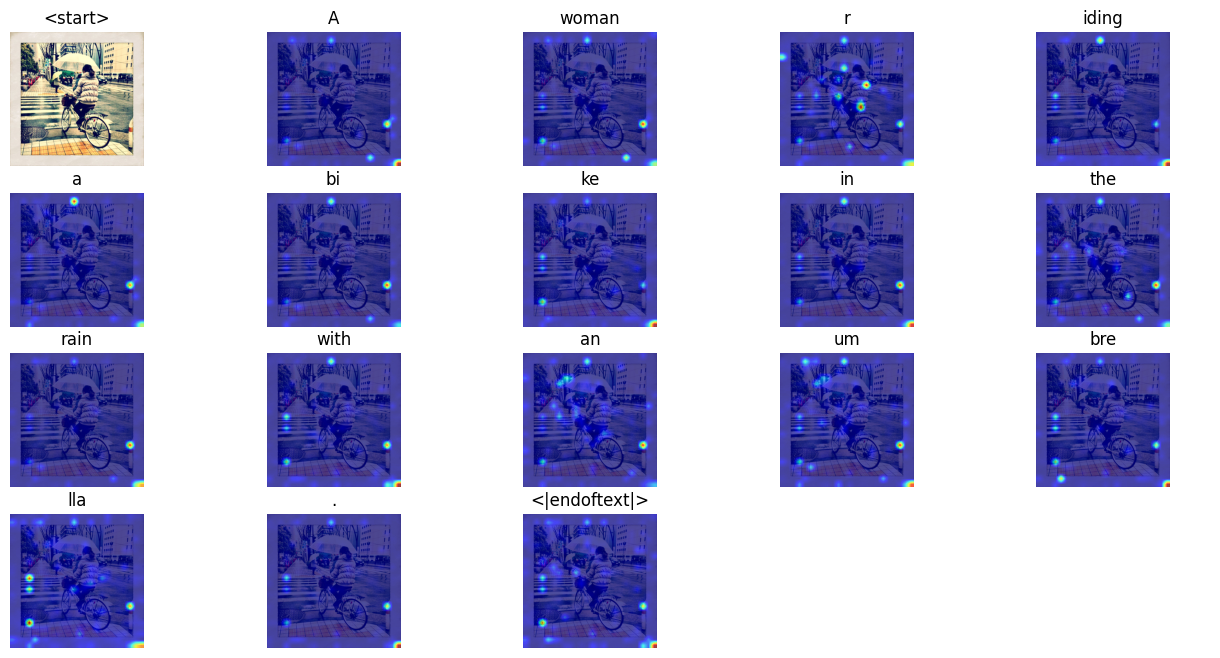

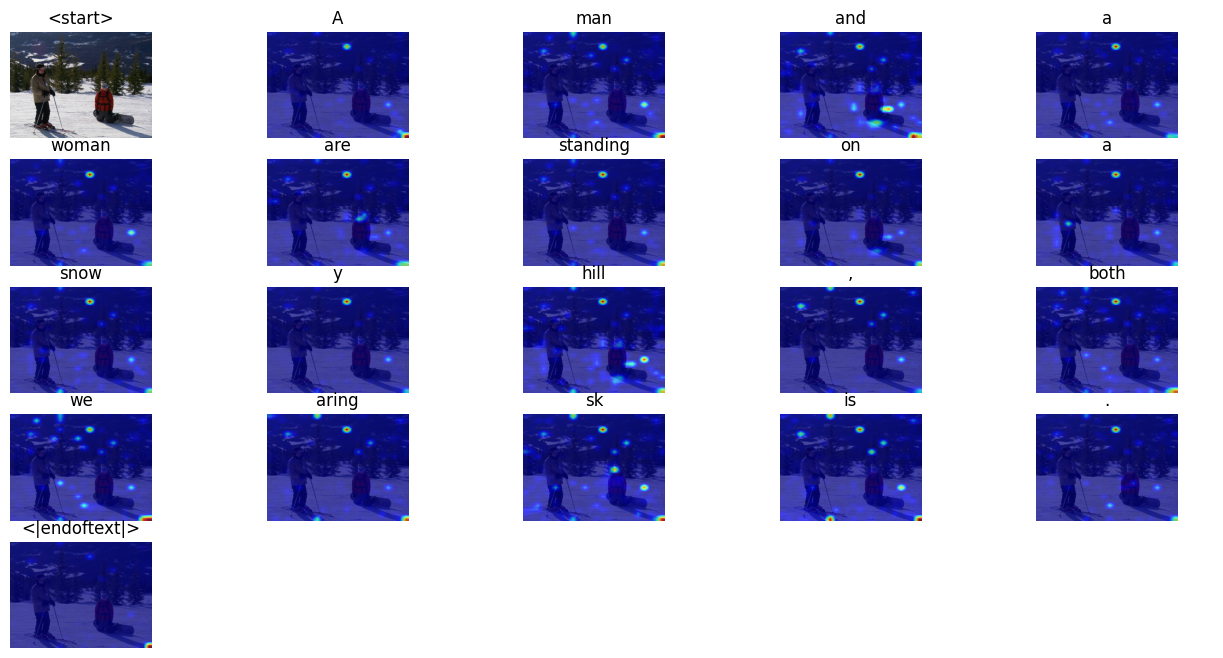

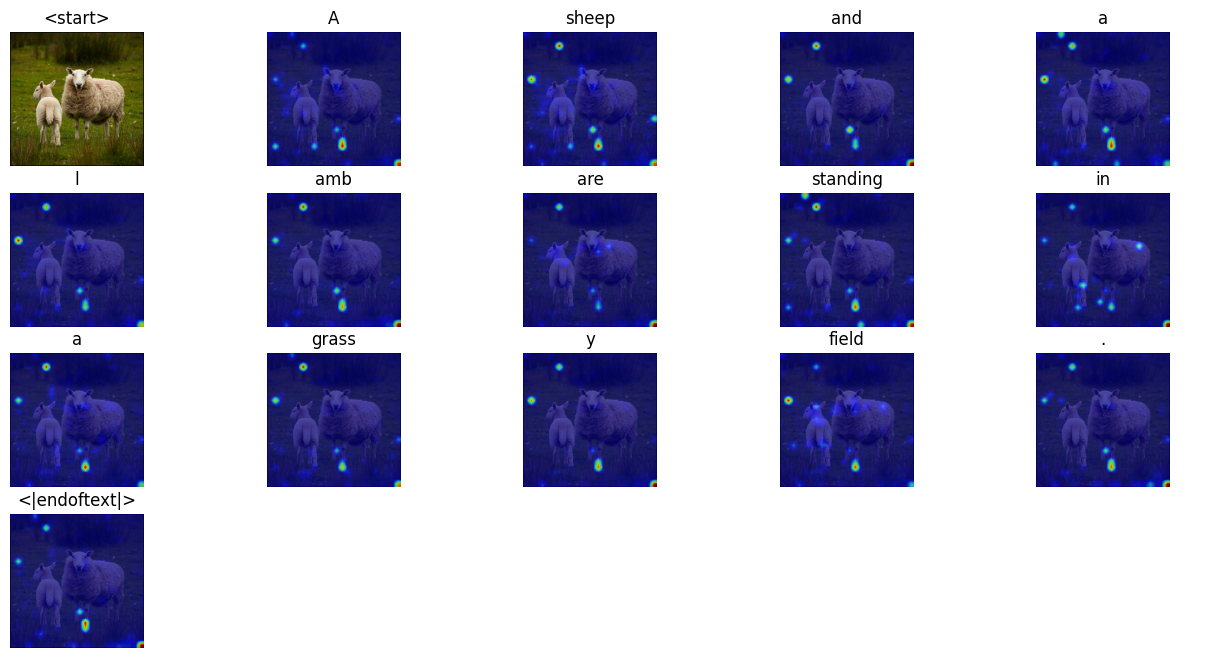

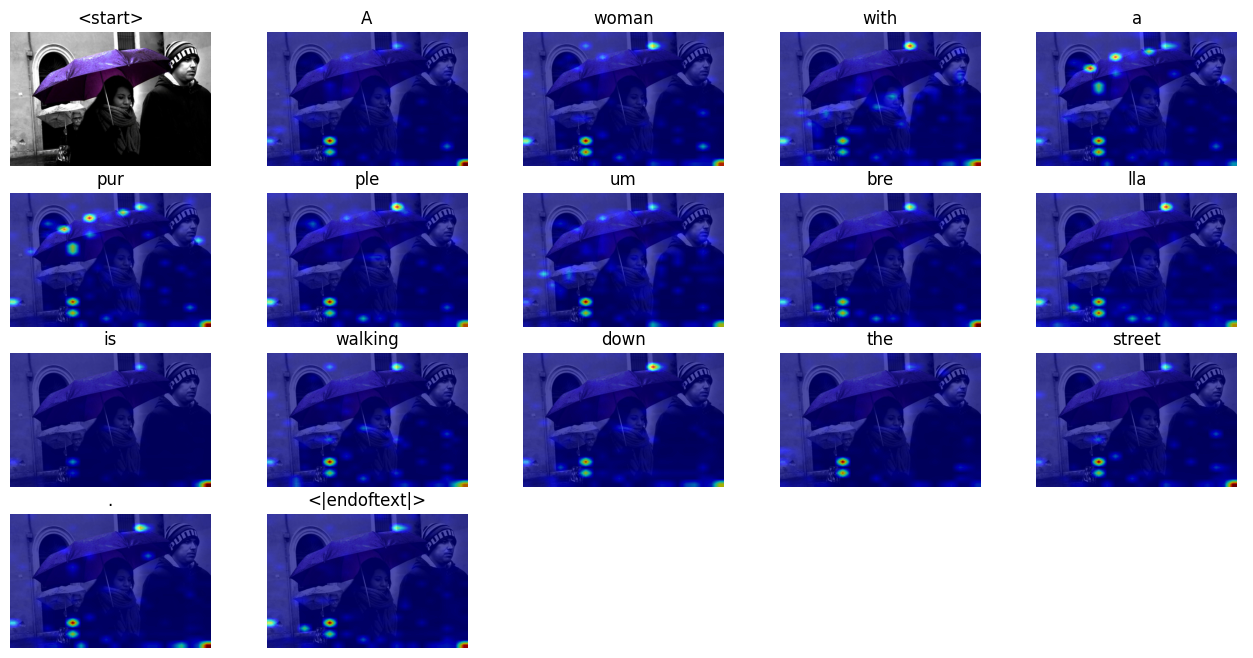

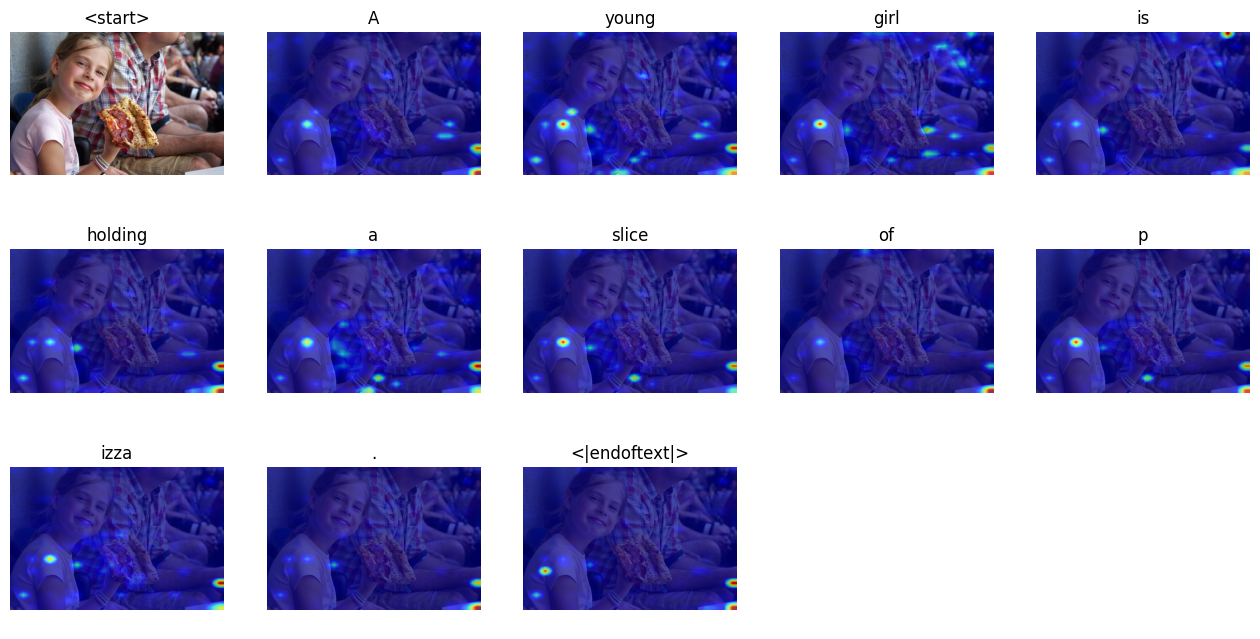

In [ ]:
import matplotlib.pyplot as plt
from torchvision.transforms.functional import resize
import numpy as np
paths_list = glob('/mnt/gestalt/home/lonian/dlcv/hw3/hw3_data/p3_data/images/*')
result = {}
for path in tqdm(paths_list):
    name = path.split('/')[-1].split('.')[0]
    raw_image = Image.open(path)
    inputs = processor(images=raw_image, text=prompt, return_tensors='pt').to(device, torch.float16)

    output = model.generate(**inputs, max_new_tokens=200, do_sample=False)
    # print(output)
    output_text = processor.decode(output['sequences'][0], skip_special_tokens=True)
    # print(output_text)
    gen_cap = output['sequences'][0].shape[0] - inputs['input_ids'].shape[1]
    # print(inputs['input_ids'].shape[1], output['sequences'][0].shape[0])
    output_id = output['sequences'][0][-gen_cap:]
    # print(output_id)
    # print(processor.decode(output_id, skip_special_tokens=True))
    result[name] = output_text.split('ASSISTANT: ')[-1]
    vis_atten_map(output, raw_image, output_id, processor)
    # break

In [ ]:
output.keys()

odict_keys(['sequences', 'attentions', 'past_key_values'])

In [ ]:
len(output['attentions']), output['past_key_values'][-4][1].shape

(17, torch.Size([1, 32, 617, 128]))

In [ ]:
output['attentions'][2][0].shape

torch.Size([1, 32, 1, 603])

In [ ]:
for i in range(len(output['attentions'])):
    # print(.shape)
    attn_map = output['attentions'][i][-2][0, :, 0, 5:5+576].mean(dim=0).reshape(24, 24)
    attn_map -= torch.min(attn_map)
    attn_map /= torch.max(attn_map)
    # [5:5+576]
    break

In [ ]:
print(len(output['attentions']), len(output['attentions'][-1]), output['attentions'][-2][-1].shape)
# num_token, layers, head

17 32 torch.Size([1, 32, 1, 616])


In [ ]:
output['attentions'][-3][-1].shape

torch.Size([1, 32, 1, 615])

In [ ]:
output.keys()

odict_keys(['sequences', 'attentions', 'past_key_values'])

# P2 plot

In [1]:
import os
import numpy as np
import timm
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform
import torch
from torch import Tensor, nn
from PIL import Image
from tqdm import tqdm
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import json
from tokenizer import BPETokenizer
from P3_lora_decoder import *
from P3_dataloader import *
import loralib as lora
from torchvision import transforms

/home/lonian/anaconda3/envs/dlcv_3/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
device = 'cuda:0'
transform = create_transform(
    **resolve_data_config({}, model="vit_large_patch14_clip_224")
)
vision_encoder = timm.create_model(
        "vit_large_patch14_clip_224", pretrained=True, num_classes=0
    ).to(device)


text_encoder = BPETokenizer(encoder_file='./encoder.json', vocab_file='./vocab.bpe')


cfg = Config('./hw3_data/p2_data/decoder_model.bin')
caption_model = Caption_model(cfg).to(device)
# Load the pretrained checkpoint first
# caption_model.load_state_dict(torch.load('./ckpt/rank_32_attn_mlp_causal_all/015_general.pt', map_location=device), strict=False)
# caption_model.load_state_dict(torch.load('./ckpt/rank_32_attn_mlp_causal_all/015_lora.pt', map_location=device), strict=False)
caption_model.load_state_dict(torch.load('./ckpt/rank_32_attn_mlp/009_general.pt', map_location=device))
caption_model.load_state_dict(torch.load('./ckpt/rank_32_attn_mlp/009_lora.pt', map_location=device), strict=False)

In [ ]:
val_data = P3_inference_Dataset(img_folder='./hw3_data/p3_data/images', transform=transform)
val_loader = DataLoader(dataset=val_data, batch_size = 1, shuffle=False, num_workers=4, pin_memory=True)

In [ ]:
import matplotlib.pyplot as plt
def visualize_attention(img, querys, keys, output_ids, img_name):
    '''
    querys = [n_token, n_heads, L, 64]
    '''
    tokenizer = BPETokenizer(encoder_file='./encoder.json', vocab_file='./vocab.bpe')
    img = img.squeeze(0).permute(1, 2, 0).cpu()
    img = (img - img.min()) / (img.max() - img.min())

    num_cols = 5  # 每row兩個
    num_plots = len(querys)+1
    print('num_plots', num_plots)
    num_rows = math.ceil(num_plots / num_cols)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))
    plt.subplots_adjust(hspace=0.5, wspace=0.5)

    ax = axes[0 // num_cols, 0 % num_cols]
    ax.imshow(img.cpu())
    title = tokenizer.decode([output_ids[0]])
    ax.set_title(f"{title}")
    ax.axis('off')
    
    for ii in range(len(querys)):
        i = ii+1
        ax = axes[i // num_cols, i % num_cols]
        title = tokenizer.decode([output_ids[i]])
        att = querys[ii] @ keys[ii].transpose(-2, -1) * (1.0 / math.sqrt(keys[ii].size(-1)))
        # att = querys[ii] @ keys[ii].permute(1, 0) * (1.0 / math.sqrt(keys[ii].size(-1)))
        att = att[1:257, -1].view(1, 16, 16)
        att -= torch.min(att)
        att /= torch.max(att)
        attention_resized = F.interpolate(
            att.unsqueeze(0), size=img.shape[:2], mode="bilinear", align_corners=False
        )

        # plt.imshow(attention_resized, cmap="jet", alpha=0.5)  # 使用半透明的熱圖

        ax.imshow(img.cpu())
        ax.set_title(f"{title}")
        ax.axis('off')



        # if i != 0:
        ax.imshow(attention_resized.squeeze().cpu().numpy(), cmap="jet", alpha=0.5)

    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])


    # plt.colorbar()
    plt.savefig(f"{img_name}.png")

In [ ]:
text_encoder = BPETokenizer(encoder_file='./encoder.json', vocab_file='./vocab.bpe')
print('------Begin Inference Model------')
caption_model.eval()

def fetch_q(module, input, output):
    query = output[1].detach()  # 確保與當前計算圖脫離
    # global hook_q
    hook_q.append(query.squeeze(0))

def fetch_k(module, input, output):
    key = output[2].detach()  # 確保與當前計算圖脫離
    # global hook_k
    hook_k.append(key.squeeze(0))


result = {}
hook_q = []
hook_k = []
# caption_model.decoder.transformer.h[11].attn.register_forward_hook(fetch_q)
# caption_model.decoder.transformer.h[11].attn.register_forward_hook(fetch_k)
for block in caption_model.decoder.transformer.h:
    block.attn.register_forward_hook(fetch_q)
    block.attn.register_forward_hook(fetch_k)


------Begin Inference Model------


In [ ]:
for handle in hook_q:
    del handle
    # handle.remove()
for handle in hook_k:
    del handle
    # handle.remove()
hook_q.clear()
hook_k.clear()

In [ ]:
vision_encoder.num_classes

0

In [ ]:
caption_model.decoder.transformer.h

Sequential(
  (0): Block(
    (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (attn): Attention(
      (c_attn): MergedLinear(
        in_features=768, out_features=2304, bias=True
        (lora_dropout): Dropout(p=0.2, inplace=False)
      )
      (c_proj): Linear(in_features=768, out_features=768, bias=True)
    )
    (mlp): Sequential(
      (c_fc): Linear(in_features=768, out_features=3072, bias=True)
      (act): GELU(approximate='tanh')
      (c_proj): Linear(in_features=3072, out_features=768, bias=True)
    )
  )
  (1): Block(
    (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (attn): Attention(
      (c_attn): MergedLinear(
        in_features=768, out_features=2304, bias=True
        (lora_dropout): Dropout(p=0.2, inplace=False)
      )
      (c_proj): Linear(in_features=768, out_features=768, bias=True)
    )

  0%|          | 0/5 [00:00<?, ?it/s]

12 12
num_plots 13


 20%|██        | 1/5 [00:10<00:41, 10.35s/it]

12 12
num_plots 13


 40%|████      | 2/5 [00:14<00:19,  6.60s/it]

11 11
num_plots 12


 60%|██████    | 3/5 [00:18<00:11,  5.53s/it]

11 11
num_plots 12


 80%|████████  | 4/5 [00:21<00:04,  4.63s/it]

14 14
num_plots 15


100%|██████████| 5/5 [00:26<00:00,  5.33s/it]


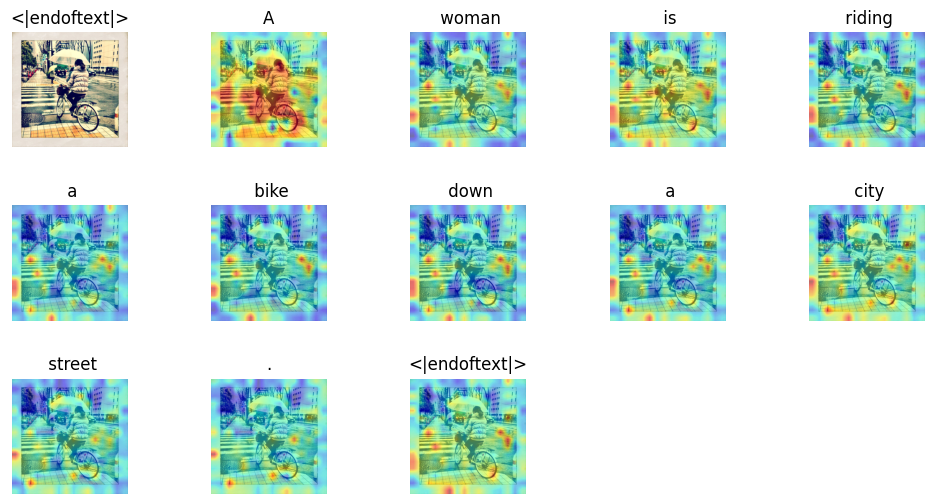

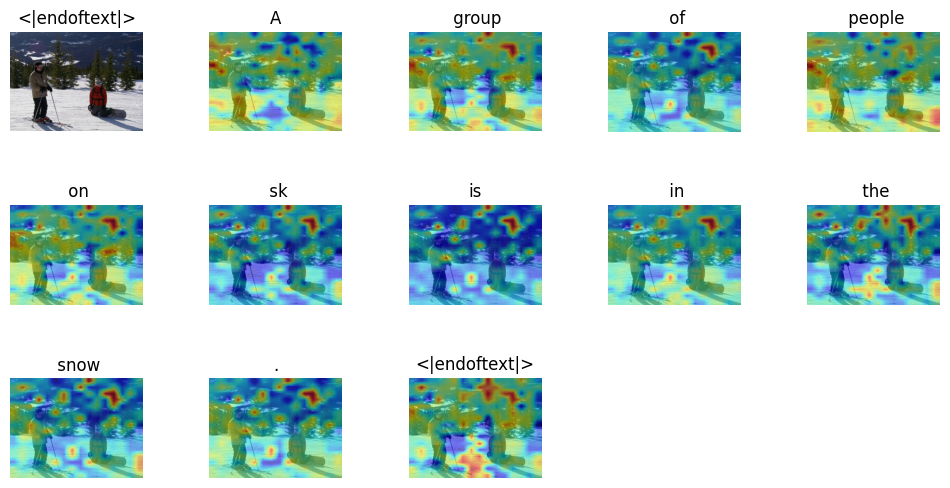

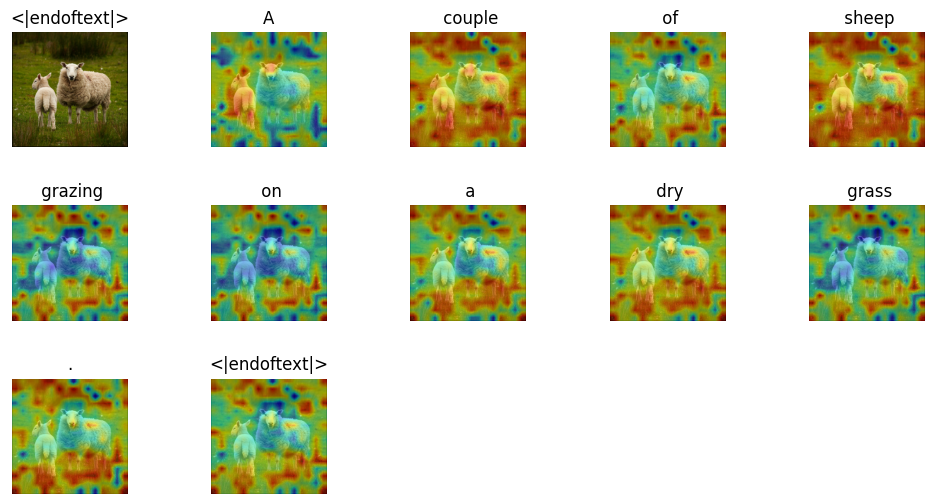

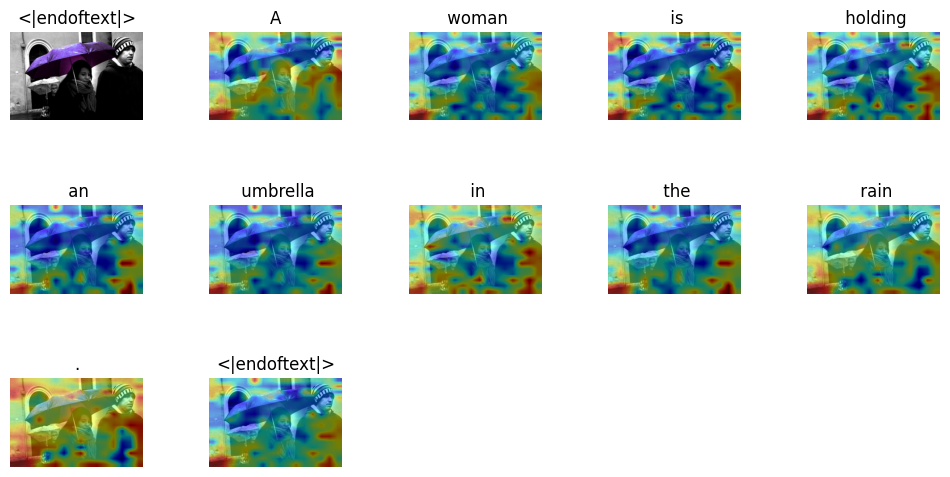

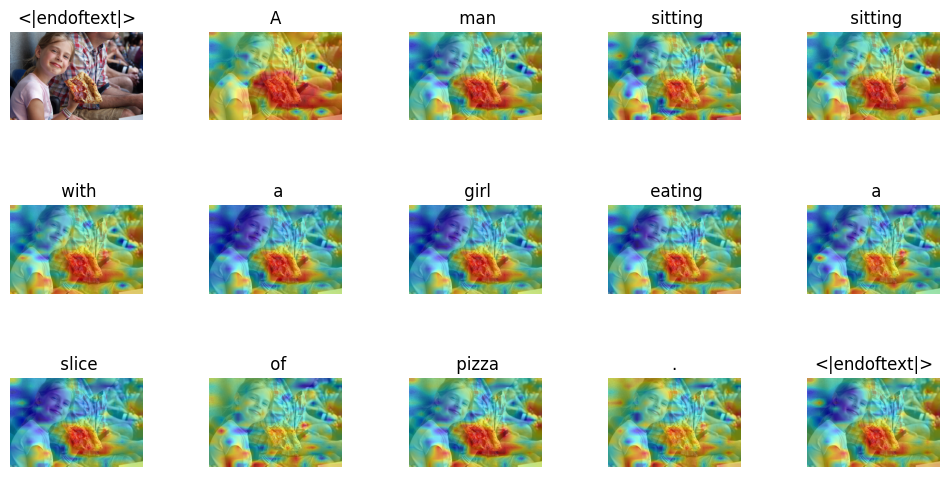

In [ ]:
for batch in tqdm(val_loader):
    filenames, imgs, ori_imgs = batch
    # print(filenames)
    imgs = imgs.to(device)
    # with torch.autocast(device_type="cuda"):
    with torch.no_grad():
        image_features = vision_encoder.forward_features(imgs)
        # print(image_features.shape)
        
        output_ids = caption_model.beam_search(image_features[:, 1:, :], beams=1)
        
        querys = []
        keys = []
        querys = [hook_q[i] for i in range(1, len(hook_q)) if i % 12 == 11]
        keys = [hook_k[i] for i in range(1, len(hook_k)) if i % 12 == 11]
        print(len(querys), len(keys))
        # for i in querys:
        #     print(i.shape) #[12, L, 64]
        visualize_attention(
            ori_imgs,
            # hook_q,
            # hook_k,
            querys,
            keys,
            output_ids,
            filenames[0],
        )
        
        
        for handle in hook_q:
            del handle
            # handle.remove()
        for handle in hook_k:
            del handle
            # handle.remove()
        hook_q.clear()
        hook_k.clear()
        # break

13 13
num_plots 14
13 13
num_plots 14


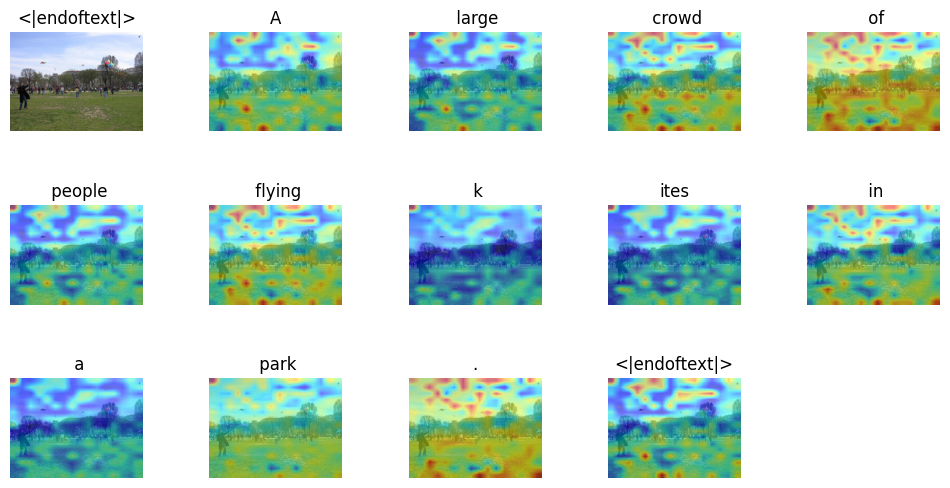

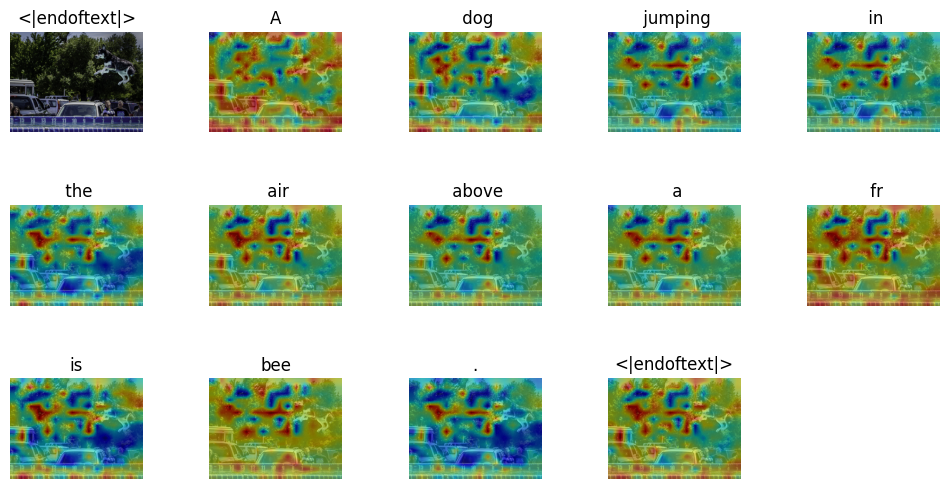

In [27]:
id_list = ['000000001086', '000000001050']

ori_trans = transforms.Compose(
            [
                transforms.ToTensor(),
            ]
        )
for name in id_list:
    image_path = f'/mnt/gestalt/home/lonian/dlcv/hw3/hw3_data/p2_data/images/val/{name}.jpg'
    image = Image.open(image_path).convert('RGB')
    imgs = transform(image)
    ori_imgs = ori_trans(image)
    filenames = [name]
    # filenames, imgs, ori_imgs = batch
    imgs = imgs.to(device).unsqueeze(0)
    # print(imgs.shape)
    # break
    # with torch.autocast(device_type="cuda"):
    with torch.no_grad():
        image_features = vision_encoder.forward_features(imgs)
        # print(image_features.shape)
        
        output_ids = caption_model.beam_search(image_features, beams=1)
        
        querys = []
        keys = []
        
        # for i in hook_q:
        #     print(i.shape)
        
        querys = [hook_q[i] for i in range(1, len(hook_q)) if i % 12 == 11]
        keys = [hook_k[i] for i in range(1, len(hook_k)) if i % 12 == 11]
        print(len(querys), len(keys))
        # for i in querys:
        #     print(i.shape) #[12, L, 64]
        visualize_attention(
            ori_imgs,
            # hook_q,
            # hook_k,
            querys,
            keys,
            output_ids,
            filenames[0],
        )
        
        
        for handle in hook_q:
            del handle
            # handle.remove()
        for handle in hook_k:
            del handle
            # handle.remove()
        hook_q.clear()
        hook_k.clear()
        # break

In [ ]:

print(hook_q[-4].shape, hook_k[-4].shape)

torch.Size([269, 768]) torch.Size([269, 768])


In [ ]:
i_l = 4
t_l = 6
B=5
img_mask = torch.ones((B, i_l+t_l, i_l+t_l), dtype=torch.bool)
img_mask_img = torch.zeros((i_l, t_l), dtype=torch.bool)
causal_mask = torch.tril(torch.ones((t_l, t_l), dtype=torch.bool))
# for i in range(1):
img_mask[:, :i_l, i_l:] = img_mask_img.unsqueeze(0).expand(5, -1, -1)
img_mask[:, i_l:, i_l:] = causal_mask.unsqueeze(0).expand(5, -1, -1)
img_mask[0]

tensor([[ True,  True,  True,  True, False, False, False, False, False, False],
        [ True,  True,  True,  True, False, False, False, False, False, False],
        [ True,  True,  True,  True, False, False, False, False, False, False],
        [ True,  True,  True,  True, False, False, False, False, False, False],
        [ True,  True,  True,  True,  True, False, False, False, False, False],
        [ True,  True,  True,  True,  True,  True, False, False, False, False],
        [ True,  True,  True,  True,  True,  True,  True, False, False, False],
        [ True,  True,  True,  True,  True,  True,  True,  True, False, False],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True, False],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [ ]:
img_mask = torch.ones((1, 5, 5), dtype=torch.bool)

In [ ]:
att = att.masked_fill(self.bias[:,:,:T,:T] == 0, float('-inf'))

In [ ]:
# hook_q = []
print(len(hook_q))
for i in hook_q:
    print(i.shape)

117
torch.Size([258, 768])
torch.Size([258, 768])
torch.Size([258, 768])
torch.Size([258, 768])
torch.Size([258, 768])
torch.Size([258, 768])
torch.Size([258, 768])
torch.Size([258, 768])
torch.Size([258, 768])
torch.Size([259, 768])
torch.Size([259, 768])
torch.Size([259, 768])
torch.Size([259, 768])
torch.Size([259, 768])
torch.Size([259, 768])
torch.Size([259, 768])
torch.Size([259, 768])
torch.Size([259, 768])
torch.Size([260, 768])
torch.Size([260, 768])
torch.Size([260, 768])
torch.Size([260, 768])
torch.Size([260, 768])
torch.Size([260, 768])
torch.Size([260, 768])
torch.Size([260, 768])
torch.Size([260, 768])
torch.Size([261, 768])
torch.Size([261, 768])
torch.Size([261, 768])
torch.Size([261, 768])
torch.Size([261, 768])
torch.Size([261, 768])
torch.Size([261, 768])
torch.Size([261, 768])
torch.Size([261, 768])
torch.Size([262, 768])
torch.Size([262, 768])
torch.Size([262, 768])
torch.Size([262, 768])
torch.Size([262, 768])
torch.Size([262, 768])
torch.Size([262, 768])
torch.S

In [ ]:
hook_attn[-1].shape

torch.Size([12, 269, 269])

In [ ]:
------Begin Inference Model------
  0%|          | 0/5 [00:00<?, ?it/s]
torch.Size([1, 257, 1024])
torch.Size([1, 12, 258, 258])
torch.Size([5, 12, 259, 259])
torch.Size([5, 12, 260, 260])
torch.Size([5, 12, 261, 261])
torch.Size([5, 12, 262, 262])
torch.Size([5, 12, 263, 263])
torch.Size([5, 12, 264, 264])
torch.Size([5, 12, 265, 265])
torch.Size([5, 12, 266, 266])
torch.Size([5, 12, 267, 267])
  0%|          | 0/5 [00:01<?, ?it/s]
torch.Size([3, 12, 268, 268])
torch.Size([1, 12, 269, 269])
<|endoftext|>A person riding a bike down a city street.<|endoftext|>
12 0

In [ ]:
result

{'bike': 'A person riding a bike down a city street.',
 'ski': 'A man riding skis on top of a ski slope.',
 'sheep': 'A herd of sheep standing next to each other.',
 'umbrella': 'A woman is holding an umbrella over her head.',
 'girl': 'A man sitting in front of a table eating a slice of pizza.'}